# 《2023类脑计算和类脑计算系统技术》ANN编程课实验（一）
### updated by 林逸晗 邢毅诚 2023年10月14日
### by 周文浩 2022年10月13日

## 实验目标
1. 学习如何搭建深度学习环境（课前任务）

1. 入门深度学习编程框架Pytorch的基本用法

1. 了解深度学习任务的一般流程

1. 介绍真实数据集Fashion-Mnist

1. 实现基本的回归问题和分类问题

1. 掌握使用Pytorch框架设计自己的模型

#### 请大家重点关注本手册的第3，4章节 

## 1 预备知识
### 1.1 Pytorch简介
所有机器学习方法都涉及从数据中提取信息。

为了能够完成各种数据操作，需要某种方法来存储和操作数据。

首先介绍$n$维数组，也称为*张量*（tensor）。
无论使用哪个深度学习框架，它的*张量类*（在PyTorch和TensorFlow中为`Tensor`）都与Python中Numpy计算包的`ndarray`类似。

深度学习框架比Numpy的`ndarray`多两个重要功能：
1. GPU很好地支持加速计算，而NumPy仅支持CPU计算；
1. 张量类支持自动微分。

这使得张量类更适合深度学习。

#### 1.1.1 数据存储
首先，导入`torch`。

虽然被称为PyTorch，但是代码中使用`torch`而不是`pytorch`。

In [48]:
import torch

张量表示由一个数值组成的数组，这个数组可能有多个维度。

1. 具有一个轴的张量对应数学上的*向量*（vector）；
1. 具有两个轴的张量对应数学上的*矩阵*（matrix）；
1. 具有两个轴以上的张量没有特殊的数学名称。

张量中的每个值都称为张量的 *元素*（element）。

使用 `arange` 创建一个行向量 `x`，包含以0开始的前12个整数。

In [49]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

也可指定创建类型为浮点数。

In [50]:
x = torch.arange(0, 6, 0.5)
x

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000, 5.5000])

可以通过张量的`shape`属性来访问张量（沿每个轴的长度）的*形状*

In [51]:
x.shape

torch.Size([12])

如果只想知道张量中元素的总数，即形状的所有元素乘积，可以检查它的大小（size）。


In [52]:
x.numel()

12

调用`reshape`函数改变一个张量的形状而不改变元素数量和元素值。

把张量`x`从形状为（12,）的行向量转换为形状为（3,4）的矩阵。

In [53]:
X = x.reshape(3, 4)
X

tensor([[0.0000, 0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000, 3.5000],
        [4.0000, 4.5000, 5.0000, 5.5000]])

In [54]:
X.shape

torch.Size([3, 4])

可以通过`-1`自动计算出维度。

用`x.reshape(-1,4)`或`x.reshape(3,-1)`来取代`x.reshape(3,4)`。

In [55]:
X = x.reshape(3, -1)
X

tensor([[0.0000, 0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000, 3.5000],
        [4.0000, 4.5000, 5.0000, 5.5000]])

使用全0、全1、其他常量，或者从特定分布中随机采样的数字来初始化矩阵。

创建一个形状为`(2,3,4)`的张量，其中所有元素都设置为0。

In [56]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

同样，创建一个形状为`(2,3,4)`的张量，其中所有元素都设置为1。


In [57]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

通过从某个特定的概率分布中随机采样来得到张量中每个元素的值。

例如构造数组来作为神经网络中的参数时，通常会随机初始化参数的值。

创建一个形状为（3,4）的张量。
其中的每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。


In [58]:
torch.randn(3, 4)

tensor([[ 0.1694, -0.7400, -1.7336, -0.1855],
        [-1.1928, -0.2375, -0.5090, -1.3711],
        [ 0.8890, -0.7493,  0.5019, -0.0647]])

通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。

这里，最外层的列表对应于轴0，内层的列表对应于轴1。

In [59]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

#### 1.1.2 运算符

在这些数据上执行数学运算，最简单且最有用的操作是*按元素*（elementwise）运算。
它们将标准标量运算符应用于数组的每个元素。

对于将两个数组作为输入的函数，按元素运算将二元运算符应用于两个数组中的每对位置对应的元素。
可以基于任何从标量到标量的函数来创建按元素函数。

对于任意具有相同形状的张量，
常见的标准算术运算符（`+`、`-`、`*`、`/`和`**`）都可以被升级为按元素运算。
可以在同一形状的任意两个张量上调用按元素操作。

In [60]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

“按元素”方式可以应用更多的计算，包括像求幂这样的一元运算符。

In [61]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

还可以执行线性代数运算，包括向量点积和矩阵乘法。

可以把多个张量*连结*（concatenate）在一起，
把它们端对端地叠起来形成一个更大的张量。
只需要提供张量列表，并给出沿哪个轴连结。

沿行（轴-0，形状的第一个元素）
和按列（轴-1，形状的第二个元素）连结两个矩阵。

In [62]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

通过*逻辑运算符*构建二元张量。

以`X == Y`为例：
对于每个位置，如果`X`和`Y`在该位置相等，则新张量中相应项的值为1，否则该位置为0。

In [63]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

对张量中的所有元素进行求和，产生一个单元素张量。


In [64]:
X.sum()

tensor(66.)

#### 1.1.3 广播机制

在某些情况下，即使形状不同，我们仍然可以通过调用
*广播机制*（broadcasting mechanism）来执行按元素操作。
1. 首先，通过适当复制元素来扩展一个或两个数组，
以便在转换之后，两个张量具有相同的形状。
2. 其次，对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播。


In [65]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

由于`a`和`b`分别是$3\times1$和$1\times2$矩阵，如果让它们相加，它们的形状不匹配。

将两个矩阵*广播*为一个更大的$3\times2$矩阵：矩阵`a`将复制列，
矩阵`b`将复制行，然后再按元素相加。


In [66]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

#### 1.1.4 索引和切片

与Python数组一样，张量中的元素可以通过索引访问：第一个元素的索引是0，最后一个元素索引是-1；
可以指定范围以包含第一个元素和最后一个之前的元素。

用`[-1]`选择最后一个元素，用`[1:3]`选择第二个和第三个元素：


In [67]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

除读取外，还可以通过指定索引来将元素写入矩阵。


In [68]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

为多个元素赋值相同的值，只需要索引所有元素，然后为它们赋值。

例如，`[0:2, :]`访问第1行和第2行，其中“:”代表沿轴1（列）的所有元素。

In [69]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 1.2 自动微分

虽然求导的计算很简单，只需要一些基本的微积分。
但对于复杂的模型，手工进行更新是一件很痛苦的事情（而且经常容易出错）。

深度学习框架通过自动计算导数，即*自动微分*（automatic differentiation）来加快求导。
根据我们设计的模型，系统会构建一个*计算图*（computational graph），
来跟踪计算是哪些数据通过哪些操作组合起来产生输出。

自动微分使系统能够随后反向传播梯度。
这里，*反向传播*（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

假设对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导。
首先，创建变量`x`并为其分配一个初始值。

In [70]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度。

我们不会在每次对一个参数求导时都分配新的内存。
因为经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。

In [71]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

`x`是一个长度为4的向量，计算`x`和`x`的点积，得到了赋值给`y`的标量输出。

In [72]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

调用反向传播函数来自动计算`y`关于`x`每个分量的梯度。

In [73]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于$\mathbf{x}$的梯度应为$4\mathbf{x}$。
验证这个梯度是否计算正确。

In [74]:
x.grad == 4 * x

tensor([True, True, True, True])

计算`x`的另一个函数。

在默认情况下，PyTorch会累积梯度，
如果不清除之前的值

In [75]:
y = x.sum()
y.backward()
x.grad

tensor([ 1.,  5.,  9., 13.])

清除之前的值

In [76]:
x.grad.detach().zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 1.3 矢量化加速

为了利用线性代数库同时处理整个小批量的样本，我们对计算进行矢量化来代替编写开销高昂的for循环。

考虑对向量相加的两种方法：
- 使用Python的for循环遍历向量；
- 依赖对`+`的调用。

实例化两个全为1的10000维向量。

In [77]:
import time

n = 10000
a = torch.ones(n)
b = torch.ones(n)

对工作负载进行基准测试：

- 使用for循环，每次执行一位的加法。


In [78]:
c = torch.zeros(n)
start = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - start:.5f} sec'

'0.12002 sec'

- 使用重载的`+`运算符来计算按元素的和。


In [79]:
start = time.time()
d = a + b
f'{time.time() - start:.5f} sec'

'0.00000 sec'

矢量化代码通常会带来数量级的加速。

另外，将更多的数学运算放到库中，减少了出错的可能性。

## 2 回归
在机器学习领域中的大多数任务通常都与*预测*（prediction）有关。

- 预测连续的数值：*回归*（regression）问题。回归是对真实值的一种逼近预测。

- 预测离散的类别：*分类*（classification）问题，分类的最后一层通常要使用softmax函数进行判断其所属类别。分类没有逼近的概念，最终正确结果只有一个，错误的就是错误的，不会有相近的概念。

我们将介绍神经网络的整个训练过程，
包括：
1. 定义简单的神经网络架构
1. 数据处理
1. 指定损失函数
1. 如何训练模型

我们将从*线性*神经网络开始介绍神经网络的基础知识，
经典统计学习技术中的线性回归和softmax回归可以视为线性神经网络。

### 2.1 线性回归
*线性回归*（linear regression）可以追溯到19世纪初，线性回归基于几个简单的假设：
- 假设自变量$\mathbf{x}$和因变量$y$之间的关系是线性的，
即$y$可以表示为$\mathbf{x}$中元素的加权和，这里通常允许包含观测值的一些噪声；
- 假设噪声遵循正态分布。

尽管神经网络涵盖了更多更为丰富的模型，可以用描述神经网络的方式来描述线性模型，
从而把线性模型看作一个神经网络。

### 2.2 线性回归的从零开始实现

我们将从零开始实现整个线性回归方法，
包括
1. 数据流水线
1. 模型
1. 损失函数
1. 小批量随机梯度下降优化器。

虽然现代的深度学习框架几乎可以自动化地进行所有这些工作，但从零开始实现可以确保你真正知道在做什么。
同时，了解更细致的工作原理将方便我们自定义模型、自定义层或自定义损失函数。

在这一节中，我们将只使用张量和自动求导。

#### 2.2.1 生成数据集

为了简单起见，我们根据带有噪声的线性模型构造一个人造数据集，任务是使用这个有限样本的数据集来恢复这个模型的参数。

生成一个包含1000个样本的数据集，
每个样本包含从标准正态分布中采样的2个特征，
合成数据集是一个矩阵$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$。

使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$

将$\epsilon$视为模型预测和标签时的潜在观测误差，在这里认为标准假设成立，即$\epsilon$服从均值为0的正态分布。
为了简化问题，我们将标准差设为0.01。

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import torch

def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5486, 0.1078]) 
label: tensor([4.9189])


`features`中的每一行都包含一个二维数据样本，
`labels`中的每一行都包含一维标签值（一个标量）。

生成第二个特征`features[:, 1]`和`labels`的散点图，
可以直观观察到两者之间的线性关系。

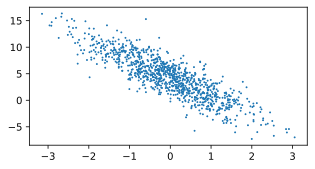

In [81]:
%matplotlib inline
plt.figure()
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

#### 2.2.2 读取数据集

训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新模型。

定义一个`data_iter`函数，
该函数接收批量大小、特征矩阵和标签向量作为输入，打乱数据集中的样本并生成大小为`batch_size`的小批量，每个小批量包含一组特征和标签。


In [82]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

利用GPU并行运算的优势，处理合理大小的“小批量”。
每个样本都可以并行地进行模型计算，且每个样本损失函数的梯度也可以被并行计算。
GPU可以在处理几百个样本时，所花费的时间不比处理一个样本时多太多。

读取第一个小批量数据样本，
每个批量的特征维度显示批量大小和输入特征数。
同样的，批量的标签形状与`batch_size`相等。


In [83]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.1081, -0.9047],
        [-1.4226,  0.6820],
        [ 0.5182,  0.9875],
        [-1.4564,  0.6056],
        [-1.2226,  1.1429],
        [ 1.3790,  0.2150],
        [-0.2901,  0.8843],
        [-1.4161,  0.8836],
        [-0.6029, -1.5762],
        [ 2.3179, -1.5543]]) 
 tensor([[ 9.4976],
        [-0.9677],
        [ 1.8795],
        [-0.7757],
        [-2.1167],
        [ 6.2379],
        [ 0.6150],
        [-1.6288],
        [ 8.3689],
        [14.1161]])


当运行迭代时，会连续地获得不同的小批量，直至遍历完整个数据集。

上面实现的迭代执行效率很低，它将所有数据加载到内存中，并执行大量的随机内存访问。
在深度学习框架中实现的内置迭代器效率要高得多，
它可以处理存储在文件中的数据和数据流提供的数据。

#### 2.2.3 初始化模型参数

在开始用小批量随机梯度下降优化模型参数之前，需要先有一些参数。

通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重，
并将偏置初始化为0。


In [84]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

在初始化参数之后，更新这些参数，直到这些参数足够拟合我们的数据。

每次更新都需要计算损失函数关于模型参数的梯度。
有了这个梯度，我们就可以向减小损失的方向更新每个参数。
因为手动计算梯度很枯燥而且容易出错，所以使用自动微分来计算梯度。

#### 2.2.4 定义模型

定义模型，将模型的输入和参数同模型的输出关联起来。


In [85]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

#### 2.2.5 定义损失函数
计算损失函数的梯度，这里使用平方损失函数。

均方误差损失函数（简称均方损失）假设了观测中包含噪声，其中噪声服从正态分布。

##### 正态分布与平方损失
正态分布（normal distribution），也称为*高斯分布*（Gaussian distribution）。若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

噪声正态分布如下式:

$$y = f(\mathbf{x}) + \epsilon,$$

其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。

通过给定的$\mathbf{x}$观测到特定$y$的*似然*（likelihood）：

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - f(\mathbf{x}))^2\right).$$

根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的*似然*最大的值：

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

由于历史原因，优化通常是说最小化而不是最大化。
改为*最小化负对数似然*$-\log P(\mathbf y \mid \mathbf X)$，可以得到：

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - f(\mathbf{x}^{(i)})\right)^2.$$

假设$\sigma$是某个固定常数，上面式子的解并不依赖于$\sigma$。
因此，在高斯噪声的假设下，最小化均方误差等价于对模型的极大似然估计。


在实现中，我们需要将真实值`y`的形状转换为和预测值`y_hat`的形状相同。

In [86]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#### 2.2.6 定义优化算法

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。
接下来，朝着减少损失的方向更新参数。

该函数接受模型参数集合、学习速率和批量大小作为输入。每一步更新的大小由学习速率`lr`决定。

因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（`batch_size`）
来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。


In [87]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

#### 2.2.7 训练

在每次迭代中，读取一小批量训练样本，并通过模型来获得一组预测。
计算完损失后，开始反向传播，存储每个参数的梯度。
最后调用优化算法`sgd`来更新模型参数。

执行以下循环：

* 初始化参数
* 重复以下训练，直到完成
    * 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

在每个*迭代周期*（epoch）中，使用`data_iter`函数遍历整个数据集，
并将训练数据集中所有样本都使用一次。

这里的迭代周期个数`num_epochs`和学习率`lr`都是超参数，分别设为5和0.03。
设置超参数很棘手，需要通过反复试验进行调整。

In [88]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.024670
epoch 2, loss 0.000088
epoch 3, loss 0.000053
epoch 4, loss 0.000053
epoch 5, loss 0.000053


因为使用的是自己合成的数据集，所以知道真正的参数是什么。

通过比较真实参数和通过训练学到的参数来评估训练的成功程度。

In [89]:
print(f'w的估计误差: {true_w - w.detach().reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b.detach()}')

w的估计误差: tensor([-0.0002, -0.0002])
b的估计误差: tensor([0.0005])


### 2.3 线性回归的简洁实现

在上节中，我们只运用了：
1. 通过张量来进行数据存储和线性代数；
2. 通过自动微分来计算梯度。

由于数据迭代器、损失函数、优化器和神经网络层很常用，
现代深度学习库也为我们实现了这些组件。

在本节中，我们将介绍如何通过使用深度学习框架来简洁地实现线性回归模型。

#### 2.3.1 生成数据集

与上节类似，首先生成数据集。


In [90]:
import numpy as np
import torch
from torch.utils import data

def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.2938, -1.1566]) 
label: tensor([10.7409])


#### 2.3.2 读取数据集

调用框架中现有的API来读取数据。
将`features`和`labels`作为API的参数传递，并通过数据迭代器指定`batch_size`。
布尔值`is_train`表示是否希望数据迭代器对象在每个迭代周期内打乱数据。


In [91]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

使用`iter`构造Python迭代器，并使用`next`从迭代器中获取第一项。

In [92]:
next(iter(data_iter))

[tensor([[ 0.3890,  0.1199],
         [-1.1770,  0.5182],
         [ 1.1830,  0.6803],
         [-1.3691,  1.2972],
         [-0.2883, -2.6105],
         [ 2.3022,  0.2253],
         [-1.1470,  2.0046],
         [ 0.1442, -1.3843],
         [-0.2998,  0.1534],
         [ 2.3114,  0.2835]]),
 tensor([[ 4.5777],
         [ 0.0973],
         [ 4.2436],
         [-2.9471],
         [12.4978],
         [ 8.0340],
         [-4.9293],
         [ 9.1859],
         [ 3.0643],
         [ 7.8626]])]

#### 2.3.3 定义模型

对于标准深度学习模型，可以使用框架的预定义好的层。这使我们只需关注使用哪些层来构造模型，而不必关注层的实现细节。

首先定义`Sequential`类的实例变量`net`。
`Sequential`类将多个层串联在一起，
当给定输入数据时，`Sequential`实例将数据传入到第一层，
然后将第一层的输出作为第二层的输入，以此类推。

在PyTorch中，全连接层在`Linear`类中定义。
将两个参数传递到`nn.Linear`中，
第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1。


In [93]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

#### 2.3.4 初始化模型参数

在使用`net`之前，我们需要初始化模型参数。
深度学习框架通常有预定义的方法来初始化参数。

指定每个权重参数应该从均值为0、标准差为0.01的正态分布中随机采样，
偏置参数将初始化为零。

通过`net[0]`选择网络中的第一个图层，
然后使用`weight.detach()`和`bias.detach()`方法访问参数。

使用替换方法`normal_`和`fill_`来重写参数值。


In [94]:
net[0].weight.detach().normal_(0, 0.01)
net[0].bias.detach().fill_(0)

tensor([0.])

#### 2.3.5 定义损失函数

计算均方误差使用的是`MSELoss`类，也称为平方$L_2$范数。
默认情况下，它返回所有样本损失的平均值。


In [95]:
loss = nn.MSELoss()

#### 2.3.6 定义优化算法

小批量随机梯度下降算法是一种优化神经网络的标准工具，
PyTorch在`optim`模块中实现了该算法的许多变种。

当实例化一个`SGD`实例时，要指定优化的参数
（可通过`net.parameters()`从模型中获得）以及优化算法所需的超参数字典。

小批量随机梯度下降只需要设置`lr`值，这里设置为0.03。


In [96]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

#### 2.3.7 训练

通过深度学习框架的高级API来实现模型只需要相对较少的代码。
我们不必单独分配参数、不必定义我们的损失函数，也不必手动实现小批量随机梯度下降。
当我们需要更复杂的模型时，高级API的优势将大大增加。

当我们有了所有的基本组件，训练过程代码与我们从零开始实现时所做的非常相似：

在每个迭代周期里，完整遍历一次数据集（`train_data`），
不停地从中获取一个小批量的输入和相应的标签。
对于每一个小批量，进行以下步骤:

* 通过调用`net(X)`生成预测并计算损失`l`（前向传播）。
* 通过进行反向传播来计算梯度。
* 通过调用优化器来更新模型参数。

为了更好的衡量训练效果，计算每个迭代周期后的损失，并打印它来监控训练过程。


In [97]:
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000279
epoch 2, loss 0.000093
epoch 3, loss 0.000093
epoch 4, loss 0.000092
epoch 5, loss 0.000092


比较生成数据集的真实参数和通过有限数据训练获得的模型参数。

首先从`net`访问所需的层，然后读取该层的权重和偏置。

正如在从零开始实现中一样，我们估计得到的参数与生成数据的真实参数非常接近。


In [98]:
w = net[0].weight.detach()
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.detach()
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-9.8228e-05,  5.0354e-04])
b的估计误差： tensor([-0.0006])


## 3 分类
### 3.1 softmax回归
回归可以用于预测*多少*的问题，我们也对*分类*问题感兴趣：不是问“多少”，而是问“哪一个”。

通常用*分类*这个词来描述两个有微妙差别的问题：
1. 只对样本的“硬性”类别感兴趣，即属于哪个类别；
2. 希望得到“软性”类别，即得到属于每个类别的概率。

这两者的界限往往很模糊。其中的一个原因是：即使我们只关心硬类别，我们仍然使用软类别的模型。

#### 3.1.1 数据表示
一般的分类问题并不与类别之间的自然顺序有关。
统计学家很早以前就发明了一种表示分类数据的简单方法：*独热编码*（one-hot encoding）。
独热编码是一个向量，它的分量和类别一样多。
类别对应的分量设置为1，其他所有分量设置为0。

#### 3.1.2 网络架构
为了估计所有可能类别的条件概率，需要一个有多个输出的模型，每个类别对应一个输出。

为了解决线性模型的分类问题，需要和输出一样多的*仿射函数*（affine function），每个输出对应于它自己的仿射函数。

与线性回归一样，softmax回归也是一个单层神经网络，并且输出层也是全连接层。

#### 3.1.3 softmax运算
我们希望模型的输出$\hat{y}_j$可以视为属于类$j$的概率，
然后选择具有最大输出值的类别$\operatorname*{argmax}_j y_j$作为我们的预测。

要将输出视为概率，必须保证在任何数据上的输出都是非负的且总和为1。
此外，我们需要一个训练的目标函数，来激励模型精准地估计概率。

社会科学家邓肯·卢斯于1959年在*选择模型*（choice model）的理论基础上发明的*softmax函数*能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持可导的性质。

首先对每个未规范化的预测求幂，可以确保输出非负。
为了确保最终输出的概率值总和为1，再让每个求幂后的结果除以它们的总和。如下式：

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$

这里，对于所有的$j$总有$0 \leq \hat{y}_j \leq 1$。
因此，$\hat{\mathbf{y}}$可以视为一个正确的概率分布。
softmax运算不会改变未规范化的预测$\mathbf{o}$之间的大小次序，只会确定分配给每个类别的概率。
因此，在预测过程中，我们仍然可以用下式来选择最有可能的类别。

$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

尽管softmax是一个非线性函数，但softmax回归的输出仍然由输入特征的仿射变换决定。
因此，softmax回归是一个*线性模型*（linear model）。

### 3.2 图像分类数据集

Fashion-MNIST数据集

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')


def use_svg_display():
    """使用svg格式在Jupyter中显示绘图
    Defined in :numref:`sec_calculus`"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小
    Defined in :numref:`sec_calculus`"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴
    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点
    Defined in :numref:`sec_calculus`"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

#### 3.2.1 读取数据集

通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。

In [100]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data_fashion_mnist", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data_fashion_mnist", train=False, transform=trans, download=True)

Fashion-MNIST由10个类别的图像组成，
每个类别由*训练数据集*（train dataset）中的6000张图像
和*测试数据集*（test dataset）中的1000张图像组成。
因此，训练集和测试集分别包含60000和10000张图像。
测试数据集不会用于训练，只用于评估模型性能。


In [101]:
len(mnist_train), len(mnist_test)

(60000, 10000)

每个输入图像的高度和宽度均为28像素。
数据集由灰度图像组成，其通道数为1。

In [102]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。
以下函数用于在数字标签索引及其文本名称之间进行转换。


In [103]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

创建一个函数来可视化训练数据集中前几个样本的图像及其相应的标签。


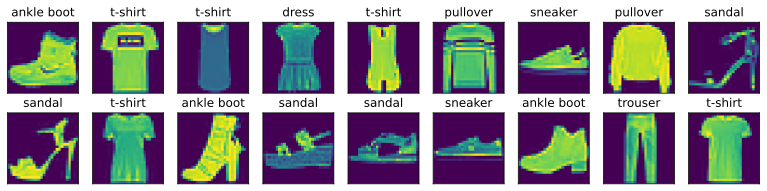

In [104]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

#### 3.2.2 读取小批量

为了在读取训练集和测试集时更容易，使用内置的数据迭代器。

在每次迭代中，数据加载器每次都会读取一小批量数据，大小为`batch_size`。

通过内置数据迭代器，可以随机打乱了所有样本，从而无偏地读取小批量。


In [105]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

读取训练数据所需的时间。


In [106]:
start = time.time()
for X, y in train_iter:
    continue
f'{time.time() - start:.2f} sec'

'6.16 sec'

#### 3.2.3 整合所有组件

定义`load_data_fashion_mnist`函数，用于获取和读取Fashion-MNIST数据集。

这个函数返回训练集和验证集的数据迭代器，此外还接受一个可选参数`resize`，用来将图像大小调整为另一种形状。


In [107]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data_fashion_mnist", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data_fashion_mnist", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

通过指定`resize`参数来测试`load_data_fashion_mnist`函数的图像大小调整功能。


In [108]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


现在已经准备好使用Fashion-MNIST数据集，便于下面的章节调用来评估各种分类算法。

### 3.3 softmax回归的从零开始实现

使用刚刚引入的Fashion-MNIST数据集，
并设置数据迭代器的批量大小为256。

In [109]:
import torch
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

#### 3.3.1 初始化模型参数

和之前线性回归的例子一样，每个样本都将用固定长度的向量表示。
原始数据集中的每个样本都是$28 \times 28$的图像，
展平每个图像看作长度为784的向量。

在softmax回归中，输出与类别一样多。
因为我们的数据集有10个类别，所以网络输出维度为10。
因此，权重将构成一个$784 \times 10$的矩阵，
偏置将构成一个$1 \times 10$的行向量。

与线性回归一样，使用正态分布初始化我们的权重`W`，偏置初始化为0。


In [110]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

#### 3.3.2 定义softmax操作

给定一个矩阵`X`，`sum`运算符可以对所有元素求和（默认情况下）。
也可以只求同一个轴上的元素，即同一列（轴0）或同一行（轴1）。

In [111]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

实现softmax由三个步骤组成：

1. 对每个项求幂（使用`exp`）；
1. 对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；
1. 将每一行除以其规范化常数，确保结果的和为1。

回顾一下表达式：

$$
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.
$$

分母或规范化常数，有时也称为*配分函数*（其对数称为对数-配分函数）。
该名称来自[统计物理学](https://en.wikipedia.org/wiki/Partition_function_(statistical_mechanics))中一个模拟粒子群分布的方程。


In [112]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

对于任何随机输入，将每个元素变成一个非负数。
此外，依据概率原理，每行总和为1。


In [113]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.7169, 0.0462, 0.1483, 0.0315, 0.0571],
         [0.0661, 0.3875, 0.3077, 0.2091, 0.0296]]),
 tensor([1.0000, 1.0000]))

注意，虽然这在数学上看起来是正确的，但在代码实现中有点草率。
矩阵中的非常大或非常小的元素可能造成数值上溢或下溢。

#### 3.3.3 定义模型

定义softmax操作后，可以实现softmax回归模型。

定义输入如何通过网络映射到输出。
将数据传递到模型之前，我们使用`reshape`函数将每张原始图像展平为向量。

In [114]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

#### 3.3.4 定义损失函数
需要一个损失函数来度量预测的效果。
与线性回归中的方法相同，使用最大似然估计。

##### 对数似然

softmax函数给出了一个向量$\hat{\mathbf{y}}$，
我们可以将其视为“对给定任意输入$\mathbf{x}$的每个类的条件概率”。
假设整个数据集$\{\mathbf{X}, \mathbf{Y}\}$具有$n$个样本，
其中索引$i$的样本由特征向量$\mathbf{x}^{(i)}$和独热标签向量$\mathbf{y}^{(i)}$组成。
我们可以将估计值与实际值进行比较：

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

其中，对于任何标签$\mathbf{y}$和模型预测$\hat{\mathbf{y}}$，损失函数为：

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

通常被称为*交叉熵损失*（cross-entropy loss）。
由于$\mathbf{y}$是一个长度为$q$的独热编码向量，
所以除了一个项以外的所有项$j$都消失了。
由于所有$\hat{y}_j$都是预测的概率，所以它们的对数永远不会大于$0$。
因此，如果正确地预测实际标签，即如果实际标签$P(\mathbf{y} \mid \mathbf{x})=1$，
则损失函数不能进一步最小化。


交叉熵损失函数可能是深度学习中最常见的损失函数，因为目前分类问题的数量远远超过回归问题的数量。

交叉熵采用真实标签的预测概率的负对数似然。
这里我们不使用Python的for循环迭代预测（这往往是低效的），
而是通过一个运算符选择所有元素。

创建一个数据样本`y_hat`，其中包含2个样本在3个类别的预测概率，
以及它们对应的标签`y`。
然后使用`y`作为`y_hat`中概率的索引，
选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。


In [115]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

只需一行代码就可以实现交叉熵损失函数。


In [116]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

#### 3.3.5 分类精度

给定预测概率分布`y_hat`，当必须输出硬预测（hard prediction）时，
通常选择预测概率最高的类。

当预测与标签分类`y`一致时，即是正确的。
分类精度即正确预测数量与总预测数量之比。
虽然直接优化精度可能很困难（因为精度的计算不可导），
但精度通常是我们最关心的性能衡量标准。

##### 计算精度
首先，`y_hat`是矩阵，第二个维度存储每个类的预测分数。
使用`argmax`获得每行中最大元素的索引来获得预测类别。

然后，将预测类别与真实`y`元素进行比较。
由于等式运算符“`==`”对数据类型很敏感，
因此将`y_hat`的数据类型转换为与`y`的数据类型一致。
结果是一个包含0（错）和1（对）的张量。

最后，求和会得到正确预测的数量。


In [117]:
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

继续使用之前定义的变量`y_hat`和`y`分别作为预测的概率分布和标签。

第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。

第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致。

因此，这两个样本的分类精度率为0.5。


In [118]:
accuracy(y_hat, y) / len(y)

0.5

同样，对于任意数据迭代器`data_iter`可访问的数据集，
可以评估在任意模型`net`的精度。

这里定义一个实用程序类`Accumulator`，用于对多个变量进行累加。
在上面的`evaluate_accuracy`函数中，
我们在`Accumulator`实例中创建了2个变量，
分别用于存储正确预测的数量和预测的总数量。
当我们遍历数据集时，两者都将随着时间的推移而累加。


In [119]:
def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator:
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

由于我们使用随机权重初始化`net`模型，
因此该模型的精度应接近于随机猜测。

在有10个类别情况下的精度为0.1。


In [120]:
evaluate_accuracy(net, test_iter)

0.102

#### 3.3.6 训练
重构训练过程的实现以使其可重复使用。

定义一个函数来训练一个迭代周期。
`updater`是更新模型参数的常用函数，它接受批量大小作为参数。


In [121]:
def train_epoch(net, train_iter, loss, updater):
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

定义一个在动画中绘制数据的实用程序类`Animator`。

In [122]:
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        backend_inline.set_matplotlib_formats('svg')
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

实现一个训练函数，
在`train_iter`访问到的训练数据集上训练一个模型`net`。
该训练函数将会运行多个迭代周期（由`num_epochs`指定）。
在每个迭代周期结束时，利用`test_iter`访问到的测试数据集对模型进行评估。

利用`Animator`类来可视化训练进度。


In [123]:
def train_model(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

使用小批量随机梯度下降来优化模型的损失函数，设置学习率为0.1。

In [124]:
lr = 0.1

def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

def updater(batch_size):
    return sgd([W, b], lr, batch_size)

训练模型5个迭代周期。

迭代周期（`num_epochs`）和学习率（`lr`）都是可调节的超参数。
通过更改它们的值，可以提高模型的分类精度。


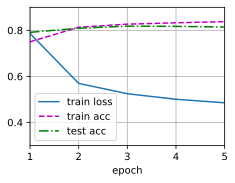

In [125]:
num_epochs = 5
train_model(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

#### 3.3.7 预测
现在训练已经完成，对图像进行分类预测。

给定一系列图像，比较它们的实际标签（文本输出的第一行）和模型预测（文本输出的第二行）。


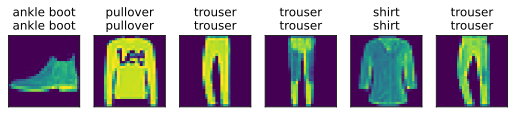

In [126]:
def predict_model(net, test_iter, n=6):
    """预测标签"""
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_model(net, test_iter)

### 3.3 softmax回归的简洁实现

同样，通过深度学习框架的高级API也能更方便地实现softmax回归模型。
本节继续使用Fashion-MNIST数据集，并保持批量大小为256。

In [127]:
import torch
from torch import nn

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

#### 3.3.1 初始化模型参数

softmax回归的输出层是一个全连接层，
因此只需在`Sequential`中添加一个带有10个输出的全连接层。
同样，在这里`Sequential`并不是必要的，
但它是实现深度模型的基础。

仍然以均值0和标准差0.01随机初始化权重。


In [128]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

#### 3.3.2 重新审视Softmax的实现
我们计算了模型的输出，然后将此输出送入交叉熵损失。
从数学上讲，这是一件完全合理的事情。
然而，从计算角度来看，指数可能会造成数值稳定性问题。

softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，
其中$\hat y_j$是预测的概率分布。
$o_j$是未规范化的预测$\mathbf{o}$的第$j$个元素。
如果$o_k$中的一些数值非常大，
那么$\exp(o_k)$可能大于数据类型容许的最大数字，即*上溢*（overflow）。
这将使分母或分子变为`inf`（无穷大），
最后得到的是0、`inf`或`nan`（不是数字）的$\hat y_j$。
在这些情况下，我们无法得到一个明确定义的交叉熵值。

在softmax计算之前，先从所有$o_k$中减去$\max(o_k)$。
每个$o_k$按常数进行的移动不会改变softmax的返回值：

$$
\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}
$$


在减法和规范化步骤之后，可能有些$o_j - \max(o_k)$具有较大的负值。
由于精度受限，$\exp(o_j - \max(o_k))$将有接近零的值，即*下溢*（underflow）。
这些值可能会四舍五入为零，使$\hat y_j$为零，
并且使得$\log(\hat y_j)$的值为`-inf`。
反向传播几步后，可能会发现一屏幕`nan`结果。

通过将softmax和交叉熵结合在一起，可以避免反向传播过程中可能会困扰我们的数值稳定性问题。
通过抵消$\log(\exp(\cdot))$，避免计算$\exp(o_j - \max(o_k))$，
而可以直接使用$o_j - \max(o_k)$。

$$
\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}\right) \\
& = \log{(\exp(o_j - \max(o_k)))}-\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)} \\
& = o_j - \max(o_k) -\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)}.
\end{aligned}
$$

也保留传统的softmax函数，以评估通过模型输出的概率。
但是，没有将softmax概率传递到损失函数中，
而是在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数，
这是一种类似["LogSumExp技巧"](https://en.wikipedia.org/wiki/LogSumExp)的方式。


In [129]:
loss = nn.CrossEntropyLoss(reduction='none')

#### 3.3.3 优化算法

使用学习率为0.1的小批量随机梯度下降作为优化算法。
这与线性回归例子中的相同，说明了优化器的普适性。


In [130]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

#### 3.3.4 训练

调用定义的训练函数来训练模型。

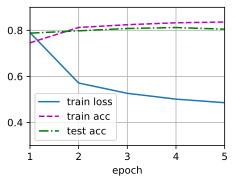

In [131]:
num_epochs = 5
train_model(net, train_iter, test_iter, loss, num_epochs, trainer)

和以前一样，这个算法使结果收敛到一个相当高的精度，而且代码比之前更精简。

## 4 多层感知机
在本节中，我们将介绍真正的*深度*网络。
最简单的深度网络称为*多层感知机*（multilayer perceptron），通常缩写为*MLP*。

仿射变换中的*线性*是一个很强的假设，通过在网络中加入一个或多个隐藏层来克服线性模型的限制，
使其能处理更普遍的函数关系类型。

### 4.1 激活函数
*激活函数*（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活，
大多数激活函数都是非线性的。

#### 4.1.1 ReLU函数

最受欢迎的激活函数是*修正线性单元*（Rectified linear unit，*ReLU*），
它实现简单，同时在各种预测任务中表现良好。

ReLU提供了一种非常简单的非线性变换。
给定元素$x$，ReLU函数被定义为该元素与$0$的最大值：

$$\operatorname{ReLU}(x) = \max(x, 0).$$

ReLU函数仅保留正元素并丢弃所有负元素。

画出函数的曲线图，可以看到，激活函数是分段线性的。


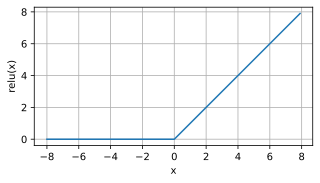

In [132]:
%matplotlib inline
import torch

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。

当输入值精确等于0时，ReLU函数不可导。
在此时，我们默认使用左侧的导数，即当输入为0时导数为0。

可以忽略这种情况，因为输入可能永远都不会是0。
引用一句古老的谚语，“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”，

绘制ReLU函数的导数。


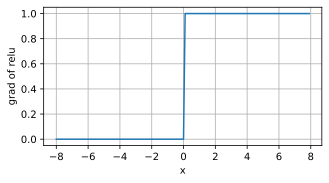

In [133]:
y.backward(torch.ones_like(x), retain_graph=True)
plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。
这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题。

ReLU函数有许多变体，包括*参数化ReLU*（Parameterized ReLU，*pReLU*）
函数。
该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

#### 4.1.2 sigmoid函数

对于一个定义域在$\mathbb{R}$中的输入，
*sigmoid函数*将输入变换为区间(0, 1)上的输出。
因此，sigmoid通常称为*挤压函数*（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

在最早的神经网络中，科学家们感兴趣的是对“激发”或“不激发”的生物神经元进行建模。
因此，这一领域的先驱可以一直追溯到人工神经元的发明者麦卡洛克和皮茨，他们专注于阈值单元。
阈值单元在其输入低于某个阈值时取值0，当输入超过阈值时取值1。

当人们逐渐关注到到基于梯度的学习时，
sigmoid函数是一个平滑的、可微的阈值单元近似。

sigmoid在隐藏层中已经较少使用，
它在大部分时候被更简单、更容易训练的ReLU所取代。

我们绘制sigmoid函数。
当输入接近0时，sigmoid函数接近线性变换。


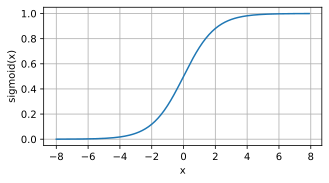

In [134]:
y = torch.sigmoid(x)
plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

sigmoid函数的导数图像如下所示。
当输入为0时，sigmoid函数的导数达到最大值0.25；
而输入在任一方向上越远离0点时，导数越接近0。


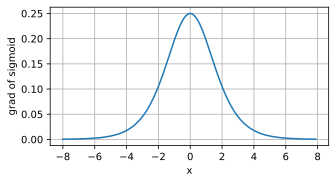

In [135]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 4.1.3 tanh函数

与sigmoid函数类似，
tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上：

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

绘制tanh函数。
当输入在0附近时，tanh函数接近线性变换。

函数的形状类似于sigmoid函数，
不同的是tanh函数关于坐标系原点中心对称。


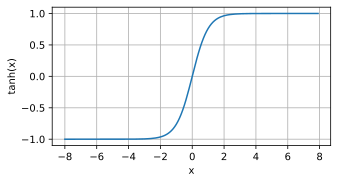

In [136]:
y = torch.tanh(x)
plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。
当输入接近0时，tanh函数的导数接近最大值1。
与sigmoid函数类似，
输入在任一方向上越远离0点，导数越接近0。


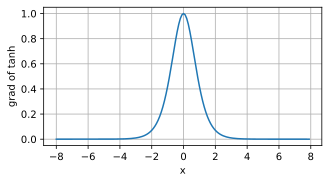

In [137]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 4.2 多层感知机的从零开始实现
为了与之前softmax回归获得的结果进行比较，
我们将继续使用Fashion-MNIST图像分类数据集。

In [138]:
import torch
from torch import nn

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

#### 4.2.1 初始化模型参数

Fashion-MNIST中的每个图像由
$28 \times 28 = 784$个灰度像素值组成。
所有图像共分为10个类别。
忽略像素之间的空间结构，
我们可以将每个图像视为具有784个输入特征
和10个类的简单分类数据集。

首先，我们将实现一个具有单隐藏层的多层感知机，
它包含256个隐藏单元。
可以将这两个变量都视为超参数，
通常，选择2的若干次幂作为层的宽度。
因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

对于每一层我们都要记录一个权重矩阵和一个偏置向量。
跟以前一样，为损失关于这些参数的梯度分配内存。


In [139]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

#### 4.2.2 激活函数

实现ReLU激活函数。

In [140]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

#### 4.2.3 模型

因为忽略了空间结构，
所以使用`reshape`将每个二维图像转换为一个长度为`num_inputs`的向量。


In [141]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

#### 4.2.4 损失函数

由于已经从零实现过softmax函数，
因此在这里直接使用高级API中的内置函数来计算softmax和交叉熵损失。

In [142]:
loss = nn.CrossEntropyLoss(reduction='none')

#### 4.2.5 训练

多层感知机的训练过程与softmax回归的训练过程完全相同。

将迭代周期数设置为5，并将学习率设置为0.1。

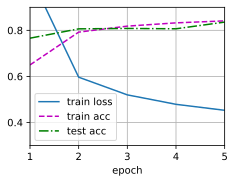

In [143]:
num_epochs, lr = 5, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_model(net, train_iter, test_iter, loss, num_epochs, updater)

为了对学习到的模型进行评估，我们将在一些测试数据上应用这个模型。

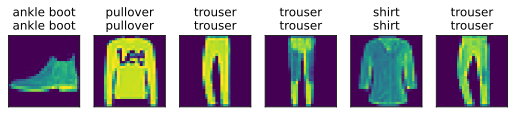

In [144]:
predict_model(net, test_iter)

### 4.3 多层感知机的简洁实现

我们可以通过高级API更简洁地实现多层感知机。

与softmax回归的简洁实现相比，
唯一的区别是添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是隐藏层，它包含256个隐藏单元，并使用了ReLU激活函数。
第二层是输出层。


In [145]:
import torch
from torch import nn

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

训练过程的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。


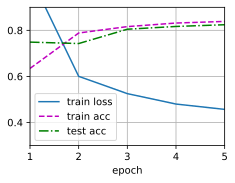

In [146]:
batch_size, lr, num_epochs = 256, 0.1, 5
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_model(net, train_iter, test_iter, loss, num_epochs, trainer)

## 5 深度学习计算
除了庞大的数据集和强大的硬件，
优秀的软件工具在深度学习的快速发展中发挥了不可或缺的作用。
从2007年发布的开创性的Theano库开始，
灵活的开源工具使研究人员能够快速开发模型原型，
避免了我们使用标准组件时的重复工作，
同时仍然保持了我们进行底层修改的能力。

随着时间的推移，深度学习库已经演变成提供越来越粗糙的抽象。
就像半导体设计师从指定晶体管到逻辑电路再到编写代码一样，
神经网络研究人员已经从考虑单个人工神经元的行为转变为从层的角度构思网络，
通常在设计架构时考虑的是更粗糙的块（block）。

### 5.1 层和块
为了实现复杂的网络，引入神经网络*块*的概念。
*块*（block）可以描述单个层、由多个层组成的组件或整个模型本身。

使用块进行抽象的一个好处是可以将一些块组合成更大的组件，
这一过程通常是递归的。
通过定义代码来按需生成任意复杂度的块，
我们可以通过简洁的代码实现复杂的神经网络。

从编程的角度来看，块由*类*（class）表示。
它的任何子类都必须定义一个将其输入转换为输出的前向传播函数，
并且必须存储任何必需的参数。
为了计算梯度，块必须具有反向传播函数。

在定义我们自己的块时，由于自动微分提供了一些后端实现，只需要考虑前向传播函数和必需的参数。

在构造自定义块之前，先回顾一下多层感知机的代码。
下面的代码生成一个网络，其中包含一个具有256个单元和ReLU激活函数的全连接隐藏层，
然后是一个具有10个隐藏单元且不带激活函数的全连接输出层。


In [147]:
import torch
from torch import nn
from torch.nn import functional as F

net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

X = torch.rand(2, 20)
net(X)

tensor([[-0.0832, -0.0689, -0.1914, -0.0247,  0.1113,  0.0398, -0.0493,  0.0862,
         -0.2221,  0.2834],
        [ 0.0268,  0.0186, -0.0276,  0.0723,  0.1139, -0.0153, -0.0630,  0.1175,
         -0.1875,  0.1580]], grad_fn=<AddmmBackward0>)

在这个例子中，通过实例化`nn.Sequential`来构建模型，
层的执行顺序是作为参数传递的。

`nn.Sequential`定义了一种特殊的`Module`，
即在PyTorch中表示一个块的类，
它维护了一个由`Module`组成的有序列表。

两个全连接层都是`Linear`类的实例，
`Linear`类本身就是`Module`的子类。

通过`net(X)`调用我们的模型来获得模型的输出，
这实际上是`net.__call__(X)`的简写。

这个前向传播函数将列表中的每个块连接在一起，将每个块的输出作为下一个块的输入。

#### 5.1.1 自定义块

每个块必须提供的基本功能：
1. 将输入数据作为其前向传播函数的参数。
1. 通过前向传播函数来生成输出。
1. 计算其输出关于输入的梯度，可通过其反向传播函数进行访问。通常这是自动发生的。
1. 存储和访问前向传播计算所需的参数。
1. 根据需要初始化模型参数。

下面的`MLP`类继承了表示块的类。它包含一个多层感知机，其具有256个隐藏单元的隐藏层和一个10维输出层。
只需要提供我们自己的构造函数（Python中的`__init__`函数）和前向传播函数。

In [148]:
class MLP(nn.Module):
    # 用模型参数声明层。这里，我们声明两个全连接的层
    def __init__(self):
        # 调用MLP的父类Module的构造函数来执行必要的初始化。
        # 这样，在类实例化时也可以指定其他函数参数，例如模型参数params（稍后将介绍）
        super().__init__()
        self.hidden = nn.Linear(20, 256)  # 隐藏层
        self.out = nn.Linear(256, 10)  # 输出层

    # 定义模型的前向传播，即如何根据输入X返回所需的模型输出
    def forward(self, X):
        # 注意，这里我们使用ReLU的函数版本，其在nn.functional模块中定义。
        return self.out(F.relu(self.hidden(X)))

首先看一下前向传播函数，它以`X`作为输入，
计算带有激活函数的隐藏表示，并输出其未规范化的输出值。

在这个`MLP`实现中，两个层都是实例变量。

接着实例化多层感知机的层，然后在每次调用前向传播函数时调用这些层。

首先，定制的`__init__`函数通过`super().__init__()`
调用父类的`__init__`函数，
`nn.Module`初始化了一系列成员变量，这些变量初始化了在模块`forward`、`backward`和权重加载等时候会被调用的hooks，也定义了parameters和buffers，省去了重复编写模版代码。

然后，实例化两个全连接层，
分别为`self.hidden`和`self.out`。
除非我们实现一个新的运算符，
否则我们不必担心反向传播函数或参数初始化，
系统将自动生成这些。

试一下这个函数：


In [149]:
net = MLP()
net(X)

tensor([[ 0.1170,  0.0309, -0.1107,  0.2276,  0.0486,  0.0152,  0.1379,  0.0563,
         -0.0087,  0.0517],
        [ 0.0970, -0.0466, -0.0038,  0.2185, -0.0030, -0.0218,  0.1164, -0.0212,
          0.0809,  0.2558]], grad_fn=<AddmmBackward0>)

块的一个主要优点是多功能性。
可以子类化块以创建层（如全连接层的类）、
整个模型（如上面的`MLP`类）或具有中等复杂度的各种组件。

#### 5.1.2 顺序块

更仔细地看看`Sequential`类是如何工作的，
`Sequential`的设计是为了把其他模块串起来。

构建我们自己的简化的`MySequential`，
只需要定义两个关键函数：

1. 将块逐个追加到列表中的函数。
1. 前向传播函数，用于将输入按追加块的顺序传递给块组成的“链条”。

下面的`MySequential`类提供了与默认`Sequential`类相同的功能。


In [150]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            # 这里，module是Module子类的一个实例。我们把它保存在'Module'类的成员
            # 变量_modules中。_module的类型是OrderedDict
            self._modules[str(idx)] = module

    def forward(self, X):
        # OrderedDict保证了按照成员添加的顺序遍历它们
        for block in self._modules.values():
            X = block(X)
        return X

`__init__`函数将每个模块逐个添加到有序字典`_modules`中。

`_modules`的主要优点是：
在模块的参数初始化过程中，
系统知道在`_modules`字典中查找需要初始化参数的子块。

当`MySequential`的前向传播函数被调用时，
每个添加的块都按照它们被添加的顺序执行。

使用`MySequential`类重新实现多层感知机。


In [151]:
net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
net(X)

tensor([[ 0.0856,  0.0756,  0.0045, -0.1536, -0.0090,  0.0375, -0.1535, -0.1643,
         -0.0312, -0.2354],
        [ 0.0943,  0.0586, -0.1047, -0.0650,  0.0124, -0.0588, -0.1056, -0.1607,
         -0.0624, -0.2286]], grad_fn=<AddmmBackward0>)

`MySequential`的用法与之前为`Sequential`类编写的代码相同。

#### 5.1.3 在前向传播函数中执行代码
不是所有的架构都是简单的顺序架构。
当需要更强的灵活性时，我们需要定义自己的块。
例如，在前向传播函数中执行Python的控制流。
此外，执行任意的数学运算，
而不是简单地依赖预定义的神经网络层。

实现一个`FixedHiddenMLP`类：


In [152]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及relu和mm函数
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

在`FixedHiddenMLP`模型中，实现了一个隐藏层，
其权重（`self.rand_weight`）在实例化时被随机初始化，之后为常量。
这个权重不是一个模型参数，因此它永远不会被反向传播更新。

然后，神经网络将这个固定层的输出通过一个全连接层。

在返回输出之前，模型运行了一个while循环，在$L_1$范数大于$1$的条件下，
将输出向量除以$2$，直到它满足条件为止。

最后，模型返回了`X`中所有项的和。

此操作可能不会常用于在任何实际任务中，
只是展示如何将任意代码集成到神经网络计算的流程中。


In [153]:
net = FixedHiddenMLP()
net(X)

tensor(-0.0169, grad_fn=<SumBackward0>)

可以混合搭配各种组合块的方法。


In [154]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64), nn.ReLU(),
                                 nn.Linear(64, 32), nn.ReLU())
        self.linear = nn.Linear(32, 16)

    def forward(self, X):
        return self.linear(self.net(X))

chimera = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHiddenMLP())
chimera(X)

tensor(-0.0753, grad_fn=<SumBackward0>)

### 5.2 参数管理

此外，有时我们希望提取参数，以便在其他环境中复用它们，
将模型保存下来，以便它可以在其他软件中执行，
或者为了获得科学的理解而进行检查。

本节，我们将介绍：

* 访问参数，用于调试、诊断和可视化。
* 参数初始化。
* 在不同模型组件间共享参数。

首先看一下具有单隐藏层的多层感知机。


In [155]:
import torch
from torch import nn

net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(size=(2, 4))
net(X)

tensor([[0.1030],
        [0.1133]], grad_fn=<AddmmBackward0>)

#### 5.2.1 参数访问

从已有模型中访问参数。
当通过`Sequential`类定义模型时，
可以通过索引来访问模型的任意层。

检查第二个全连接层的参数。


In [156]:
print(net[2].state_dict())

OrderedDict([('weight', tensor([[-0.3439, -0.0264,  0.0712,  0.1156,  0.1821, -0.1834, -0.3524,  0.0565]])), ('bias', tensor([0.0627]))])


这个全连接层包含两个参数，分别是该层的权重和偏置。
两者都存储为单精度浮点数（float32）。

##### 目标参数

每个参数都表示为参数类的一个实例。
要对参数执行任何操作，首先我们需要访问底层的数值。

从第二个全连接层（即第三个神经网络层）提取偏置，
提取后返回的是一个参数类实例，并进一步访问该参数的值。


In [157]:
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([0.0627], requires_grad=True)
tensor([0.0627])


参数是复合的对象，包含值、梯度和额外信息。

在上面这个网络中，由于我们还没有调用反向传播，所以参数的梯度处于初始状态。


In [158]:
net[2].weight.grad == None

True

##### 一次性访问所有参数

当我们处理更复杂的块（例如，嵌套块）时，情况可能会变得特别复杂，
因为我们需要递归整个树来提取每个子块的参数。

比较访问第一个全连接层的参数和访问所有层。


In [159]:
print(*[(name, param.shape) for name, param in net[0].named_parameters()])
print(*[(name, param.shape) for name, param in net.named_parameters()])

('weight', torch.Size([8, 4])) ('bias', torch.Size([8]))
('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


另一种访问网络参数的方式。


In [160]:
net.state_dict()['2.bias'].data

tensor([0.0627])

##### 从嵌套块收集参数

如果将多个块相互嵌套，参数命名约定是如何工作的。

首先定义一个生成块的函数（可以说是“块工厂”），然后将这些块组合到更大的块中。


In [161]:
def block1():
    return nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                         nn.Linear(8, 4), nn.ReLU())

def block2():
    net = nn.Sequential()
    for i in range(4):
        # 在这里嵌套
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(4, 1))
rgnet(X)

tensor([[-0.3112],
        [-0.3113]], grad_fn=<AddmmBackward0>)

设计了网络后，看看它是如何工作的。


In [162]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


因为层是分层嵌套的，所以也可以像通过嵌套列表索引一样访问它们。

访问第一个主要的块中、第二个子块的第一层的偏置项。


In [163]:
rgnet[0][1][0].bias.data

tensor([-0.3621,  0.3609, -0.0295,  0.4408, -0.3262, -0.2311, -0.3382,  0.0513])

#### 5.2.2 参数初始化
深度学习框架提供默认随机初始化，
也允许我们创建自定义初始化方法，
满足我们通过其他规则实现初始化权重。

默认情况下，PyTorch会根据一个范围均匀地初始化权重和偏置矩阵，
这个范围是根据输入和输出维度计算出的。
PyTorch的`nn.init`模块提供了多种预置初始化方法。

##### 内置初始化
首先调用内置的初始化器。

将所有权重参数初始化为标准差为0.01的高斯随机变量，
且将偏置参数设置为0。


In [164]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)
net.apply(init_normal)
net[0].weight.data, net[0].bias.data

(tensor([[-0.0046,  0.0110,  0.0086, -0.0197],
         [-0.0081, -0.0068, -0.0019,  0.0031],
         [-0.0055,  0.0009, -0.0008,  0.0055],
         [-0.0047, -0.0036,  0.0034,  0.0257],
         [-0.0037,  0.0064,  0.0014, -0.0039],
         [-0.0118, -0.0023,  0.0025, -0.0051],
         [ 0.0057,  0.0150, -0.0237,  0.0126],
         [-0.0072,  0.0097, -0.0204, -0.0088]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

将所有参数初始化为给定的常数

初始化为1。


In [165]:
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)
net.apply(init_constant)
net[0].weight.data, net[0].bias.data

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

对某些块应用不同的初始化方法。

使用Xavier初始化方法初始化第一个神经网络层，
然后将第三个神经网络层初始化为常量值42。


In [166]:
def init_xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

net[0].apply(init_xavier)
net[2].apply(init_42)
print(net[0].weight.data)
print(net[2].weight.data)

tensor([[ 0.3072, -0.4990, -0.6585,  0.4703],
        [ 0.5363, -0.0349, -0.1105,  0.2602],
        [-0.4059,  0.0748,  0.2058, -0.0110],
        [ 0.0207, -0.3463, -0.4761,  0.6844],
        [ 0.5400,  0.2009, -0.3538,  0.1397],
        [ 0.3376,  0.3944,  0.5644, -0.0409],
        [-0.2268,  0.1883,  0.0595, -0.1099],
        [-0.4905, -0.3431,  0.4610, -0.7025]])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


可以直接设置参数。


In [167]:
net[0].weight.data[:] += 1
net[0].weight.data[0, 0] = 42
net[0].weight.data[0]

tensor([42.0000,  0.5010,  0.3415,  1.4703])

#### 5.2.3 参数绑定

在多个层间共享参数：
我们可以定义一个稠密层，然后使用它的参数来设置另一个层的参数。


In [168]:
# 我们需要给共享层一个名称，以便可以引用它的参数
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.Linear(8, 1))
net(X)
# 检查参数是否相同
print(net[2].weight.data[0] == net[4].weight.data[0])
net[2].weight.data[0, 0] = 100
# 确保它们实际上是同一个对象，而不只是有相同的值
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


第三个和第五个神经网络层的参数是绑定的。
它们不仅值相等，而且由相同的张量表示。
因此，如果我们改变其中一个参数，另一个参数也会改变。

由于模型参数包含梯度，因此在反向传播期间第二个隐藏层
（即第三个神经网络层）和第三个隐藏层（即第五个神经网络层）的梯度会加在一起。


## 6 正则化
### 6.1 模型选择、欠拟合和过拟合
我们的目标是发现某些*模式*（pattern），
这些模式捕捉到了我们训练集潜在总体的规律。
如果成功做到了这点，即使是对以前从未遇到过的个体，
模型也可以成功地评估风险。
如何发现可以泛化的模式是机器学习的根本问题。

困难在于，当我们训练模型时，我们只能访问和使用数据中的小部分有限的样本。
当收集到更多的数据时，可能会发现之前找到的明显关系并不成立。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为*过拟合*（overfitting），
用于对抗过拟合的技术称为*正则化*（regularization）。

#### 6.1.1 训练误差和泛化误差
*训练误差*（training error）是指，
模型在训练数据集上计算得到的误差。
*泛化误差*（generalization error）是指，
模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

问题是，我们永远不能准确地计算出泛化误差。
这是因为无限多的数据样本是一个虚构的对象。
在实际中，我们只能通过将模型应用于一个独立的测试集来估计泛化误差，
该测试集由随机选取的、未曾在训练集中出现的数据样本构成。

#### 6.1.2 欠拟合还是过拟合？
训练误差和验证误差都很严重。

如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足），
无法捕获试图学习的模式。
由于训练和验证误差之间的*泛化误差*很小，
可以用一个更复杂的模型降低训练误差。
这种现象被称为*欠拟合*（underfitting）。

当训练误差明显低于验证误差时，
这表明严重的*过拟合*（overfitting）。

是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小。

##### 模型复杂性

为了说明一些关于过拟合和模型复杂性的经典直觉，
给出一个多项式的例子。

给定由单个特征$x$和对应实数标签$y$组成的训练数据，
试图找到下面的$d$阶多项式来估计标签$y$。

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

这只是一个线性回归问题，我们的特征是$x$的幂给出的，
模型的权重是$w_i$给出的，偏置是$w_0$给出的
（因为对于所有的$x$都有$x^0 = 1$）。

高阶多项式的参数较多，模型函数的选择范围较广。
因此在固定训练数据集的情况下，
高阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。

当数据样本包含了$x$的不同值时，
函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。

##### 数据集大小

另一个重要因素是数据集的大小。
训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。
随着训练数据量的增加，泛化误差通常会减小。

对于固定的任务和数据分布，
给出更多的数据，能够拟合更复杂的模型可能是有益的。
如果没有足够的数据，简单的模型可能更有用。

对于许多任务，深度学习只有在有数千个训练样本时才优于线性模型。
从一定程度上来说，深度学习目前的生机要归功于
廉价存储、互联设备以及数字化经济带来的海量数据集。

#### 6.1.3 多项式回归

通过多项式拟合来探索这些概念。


In [169]:
import math
import numpy as np
import torch
from torch import nn

##### 生成数据集

给定$x$，使用以下三阶多项式来生成训练和测试数据的标签：

$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$

噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。

将特征从$x^i$调整为$\frac{x^i}{i!}$，避免在优化的过程中非常大的梯度值或损失值。

为训练集和测试集各生成100个样本。


In [170]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

存储在`poly_features`中的单项式由gamma函数重新缩放，
其中$\Gamma(n)=(n-1)!$。

从生成的数据集中查看一下前2个样本，
第一个值是与偏置相对应的常量特征。


In [171]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.1237],
         [-1.5467]]),
 tensor([[ 1.0000e+00,  1.2374e-01,  7.6556e-03,  3.1576e-04,  9.7680e-06,
           2.4174e-07,  4.9853e-09,  8.8126e-11,  1.3631e-12,  1.8740e-14,
           2.3189e-16,  2.6085e-18,  2.6898e-20,  2.5602e-22,  2.2629e-24,
           1.8667e-26,  1.4436e-28,  1.0508e-30,  7.2234e-33,  4.7043e-35],
         [ 1.0000e+00, -1.5467e+00,  1.1962e+00, -6.1670e-01,  2.3846e-01,
          -7.3766e-02,  1.9016e-02, -4.2017e-03,  8.1235e-04, -1.3961e-04,
           2.1593e-05, -3.0362e-06,  3.9135e-07, -4.6561e-08,  5.1440e-09,
          -5.3042e-10,  5.1275e-11, -4.6652e-12,  4.0087e-13, -3.2633e-14]]),
 tensor([ 5.2831, -4.4044]))

##### 对模型进行训练和测试

首先实现一个函数来评估模型在给定数据集上的损失。


In [172]:
def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

定义训练函数。


In [173]:
def train_epoch_poly(net, train_iter, loss, updater):
    """训练模型一个迭代周期
    Defined in :numref:`sec_softmax_scratch`"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        train_epoch_poly(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

##### 三阶多项式函数拟合(正常)

使用三阶多项式函数，它与数据生成函数的阶数相同。

结果表明，该模型能有效降低训练损失和测试损失。
学习到的模型参数也接近真实值$w = [5, 1.2, -3.4, 5.6]$。


weight: [[ 4.8799343  1.4912001 -3.0481741  4.6347756]]


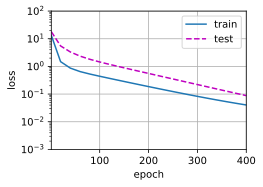

In [174]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

##### 线性函数拟合(欠拟合)

线性函数拟合，减少该模型的训练损失相对困难。
在最后一个迭代周期完成后，训练损失仍然很高。

当用来拟合非线性模式（如这里的三阶多项式函数）时，线性模型容易欠拟合。


weight: [[4.0138373 2.3464556]]


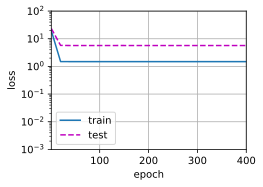

In [175]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

##### 高阶多项式函数拟合(过拟合)

使用一个阶数过高的多项式来训练模型。
在这种情况下，没有足够的数据用于学到高阶系数应该具有接近于零的值。

过于复杂的模型会轻易受到训练数据中噪声的影响。
虽然训练损失可以有效地降低，但测试损失仍然很高。

结果表明，复杂模型对数据造成了过拟合。


weight: [[ 4.9807324   1.2629615  -3.4820268   5.23013     0.307919    1.201169
   0.39448464 -0.10737066 -0.02958818  0.09646794  0.16551986  0.05994004
  -0.13023067 -0.15031303 -0.2003647   0.09637478  0.08841506  0.01646101
  -0.0270731  -0.21452847]]


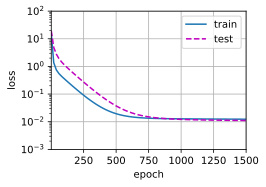

In [176]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### 6.2 权重衰减
我们总是可以通过去收集更多的训练数据来缓解过拟合。
但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。
假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。

#### 6.2.1 范数与权重衰减
在训练参数化机器学习模型时，
*权重衰减*（weight decay）是最广泛使用的正则化的技术之一，
它通常也被称为$L_2$*正则化*。

这项技术通过函数与零的距离来衡量函数的复杂度，
因为在所有函数$f$中，函数$f = 0$（所有输入都得到值$0$）
在某种意义上是最简单的。

一种简单的方法是通过线性函数
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
中的权重向量的某个范数来度量其复杂性，
例如$\| \mathbf{w} \|^2$。
要保证权重向量比较小，
最常用方法是将其范数作为惩罚项加到最小化损失的问题中。
将原来的训练目标*最小化训练标签上的预测损失*，
调整为*最小化预测损失和惩罚项之和*。

$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，
$L_1$正则化线性回归通常被称为*套索回归*（lasso regression）。
$L_2$惩罚使得学习算法偏向于在大量特征上均匀分布权重的模型。
在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，
而将其他权重清除为零。
这称为*特征选择*（feature selection），这可能是其他场景下需要的。

通常，网络输出层的偏置项不会被正则化。

#### 6.2.2 高维线性回归

通过一个简单的例子来演示权重衰减。


In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn

首先，像以前一样生成一些数据，生成公式如下：

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$

我们选择标签是关于输入的线性函数。
标签同时被均值为0，标准差为0.01高斯噪声破坏。
为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d = 200$，
并使用一个只包含20个样本的小训练集。


In [178]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = synthetic_data(true_w, true_b, n_train)
train_iter = load_array(train_data, batch_size)
test_data = synthetic_data(true_w, true_b, n_test)
test_iter = load_array(test_data, batch_size, is_train=False)

#### 6.2.3 从零开始实现

下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

##### 初始化模型参数

首先，定义一个函数来随机初始化模型参数。


In [179]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

##### 定义$L_2$范数惩罚

对所有项求平方后并将它们求和。


In [180]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

##### 定义训练代码实现

下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。

唯一的变化是损失现在包括了惩罚项。


In [181]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: linreg(X, w, b), squared_loss
    num_epochs, lr = 100, 0.003
    animator = Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

##### 忽略正则化直接训练

用`lambd = 0`禁用权重衰减后运行这个代码。

训练误差有了减少，但测试误差没有减少，
这意味着出现了严重的过拟合。


w的L2范数是： 13.306681632995605


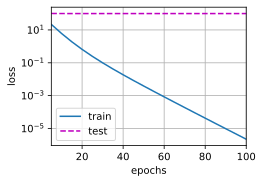

In [182]:
train(lambd=0)

##### 使用权重衰减

使用权重衰减来运行代码。

训练误差增大，但测试误差减小。
这正是我们期望从正则化中得到的效果。


w的L2范数是： 0.375774621963501


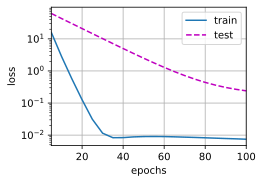

In [183]:
train(lambd=3)

#### 6.2.4 简洁实现

由于权重衰减在神经网络优化中很常用，
深度学习框架将权重衰减集成到优化算法中，以便与任何损失函数结合使用。
此外在计算上，这种集成允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。

在实例化优化器时直接通过`weight_decay`指定weight decay超参数。

默认情况下，PyTorch同时衰减权重和偏移。
这里只为权重设置了`weight_decay`，所以偏置参数$b$不会衰减。


In [184]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (evaluate_loss(net, train_iter, loss),
                          evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

运行得更快，更容易实现。

w的L2范数： 14.443672180175781


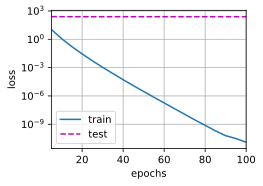

In [185]:
train_concise(0)

w的L2范数： 0.41603973507881165


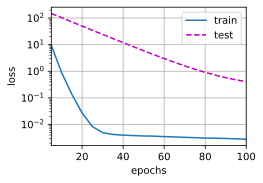

In [186]:
train_concise(3)

## 7 课后作业

在Fashion-Mnist数据集上
1. 从文档中提取整理一份可以运行的MLP代码，通过对所有超参数（批量大小，学习率、迭代周期数、隐藏层数、每层的隐藏单元数）进行联合优化，构建自己结果最好的MLP，并展示优化过程。

2. 对比不同自己实现的模块和pytorch库中调用的模块的在你的模型中的实现差别（执行效率，执行结果），分析原因并尝试提出改进方法。

3. 查看深度学习框架文档，它们提供了哪些
   * 激活函数
   * 损失函数
   * 初始化方法
   * 优化方法

每个类别尝试选择一种新的方法对比分析在你的模型中的表现。

### 提交形式：pdf格式的报告，并在报告中附上源代码。